In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import os

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
%matplotlib inline

In [7]:
from nltk.corpus import stopwords

In [8]:
import nltk
from nltk.util import ngrams
from nltk.stem.wordnet import WordNetLemmatizer
stopwords=set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
import gensim
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eremi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\eremi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
from gensim.models import Word2Vec

In [10]:
from collections import defaultdict
from collections import  Counter

In [11]:
import re
import string

In [12]:
plt.style.use('ggplot')

In [14]:
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
from keras.models import Sequential 
from keras.layers import LSTM, Flatten
from keras.layers.core import Dense, Activation, Dropout
from keras.preprocessing import sequence, text
from keras.layers import *
from keras.utils import pad_sequences

In [18]:
from transformers import pipeline
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

C:\Users\eremi\anaconda3\envs\keras_envir\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
file_path_test = r"C:\Users\eremi\Desktop\Proiect dm\dataset_test.csv"
file_path_train =r"C:\Users\eremi\Desktop\Proiect dm\dataset_train.csv"

In [20]:
train_df = pd.read_csv(file_path_train)
test_df = pd.read_csv(file_path_test)

In [21]:
#delete rows with null values 
train_df.dropna(subset=['email'],inplace=True)
test_df.dropna(subset=['email'],inplace=True)
train_df.dropna(subset=['label'],inplace=True)
test_df.dropna(subset=['label'],inplace=True)
train_df.isnull().sum()
test_df.isnull().sum()

id       0
email    0
type     0
label    0
dtype: int64

In [22]:
display(train_df.sample(5))

,id,email,type,label
1454,1455,extending refinances with options . the mort ....,Phishing Email,1
137,138,re [ 10 ] : i trust you at six male paranormal...,Phishing Email,1
2461,2462,\nBegeman's _Manufacturing Processes_\ntalks a...,Safe Email,0
3265,3266,"limited time reservation . the most nasty , ra...",Phishing Email,1
290,291,\nHot Tawnee the Internet Sensation is ready t...,Phishing Email,1


In [23]:
display(test_df.sample(5))

,id,email,type,label
2064,2065,"interview with enron dear mr . kaminski , ? ev...",Safe Email,0
1340,1341,- - - - - - - - - - - - - - - - - - - - - - fo...,Safe Email,0
1186,1187,\nForwarded-by: William Knowles http://www.the...,Safe Email,0
661,662,"On 2 Sep 2002, RossO wrote:> John Waylan (who ...",Safe Email,0
100,101,start date : 1 / 6 / 02 ; hourahead hour : 4 ;...,Safe Email,0


In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8284 entries, 0 to 8283
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      8284 non-null   int64 
 1   email   8284 non-null   object
 2   type    8284 non-null   object
 3   label   8284 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 259.0+ KB


In [25]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2155 entries, 0 to 2155
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2155 non-null   int64 
 1   email   2155 non-null   object
 2   type    2155 non-null   object
 3   label   2155 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 84.2+ KB


In [26]:
# emails phishing/ not phishing
phishing = train_df[train_df['label'] == 1]
nonphishing = train_df[train_df['label'] == 0]

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import confusion_matrix

In [29]:
def plot_features_distribution(features, title, train_df, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(train_df[feature]),kde=True,hist=False, bins=120, label=feature)
        else:
            sns.distplot(train_df[feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()

In [30]:
def plot_count(feature, title, train_df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(train_df))
    g = sns.countplot(x =feature, data = train_df)
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
plt.show()

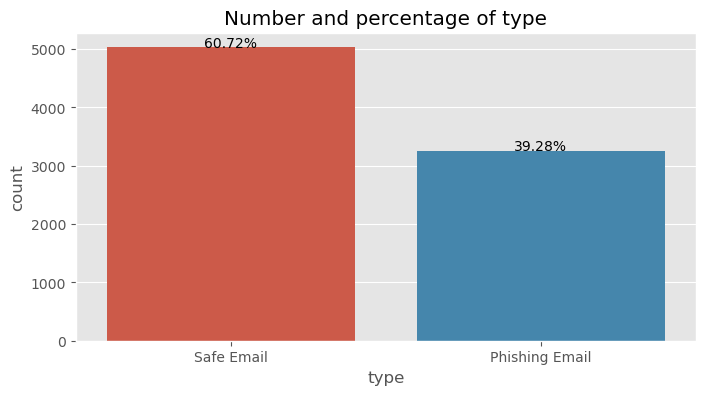

In [31]:
plot_count('type','type',train_df,2)

In [32]:
#Number of characters before preprocess
email_len = train_df.email.str.len()
email_len_1 = train_df[train_df['label']==1].email.str.len()
email_len_0 = train_df[train_df['label']==0].email.str.len()

C:\Users\eremi\anaconda3\envs\keras_envir\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='email', ylabel='Count'>

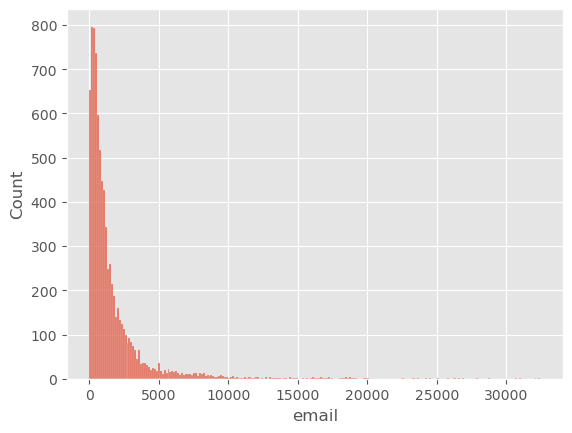

In [33]:
sns.histplot(email_len)

C:\Users\eremi\anaconda3\envs\keras_envir\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eremi\anaconda3\envs\keras_envir\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0.98, 'Number of characters per email before preprocess')

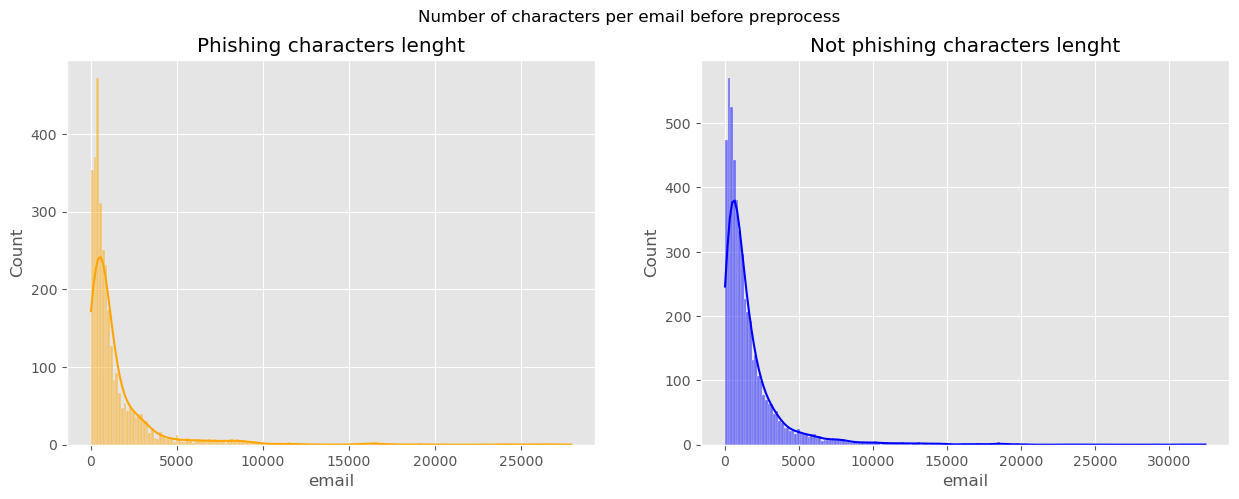

In [34]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
sns.histplot(email_len_1, color='orange', ax=ax1, kde=True)
ax1.set_title('Phishing characters lenght')
sns.histplot(email_len_0, color='blue', ax=ax2, kde=True)
ax2.set_title('Not phishing characters lenght')
fig.suptitle('Number of characters per email before preprocess')

In [35]:
#Number of words before preprocess
email_words_1 = train_df[train_df['label']==1].email.str.split().map(lambda x: len(x))
email_words_0 = train_df[train_df['label']==0].email.str.split().map(lambda x: len(x))

C:\Users\eremi\anaconda3\envs\keras_envir\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eremi\anaconda3\envs\keras_envir\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0.98, 'Number of words per email before preprocess')

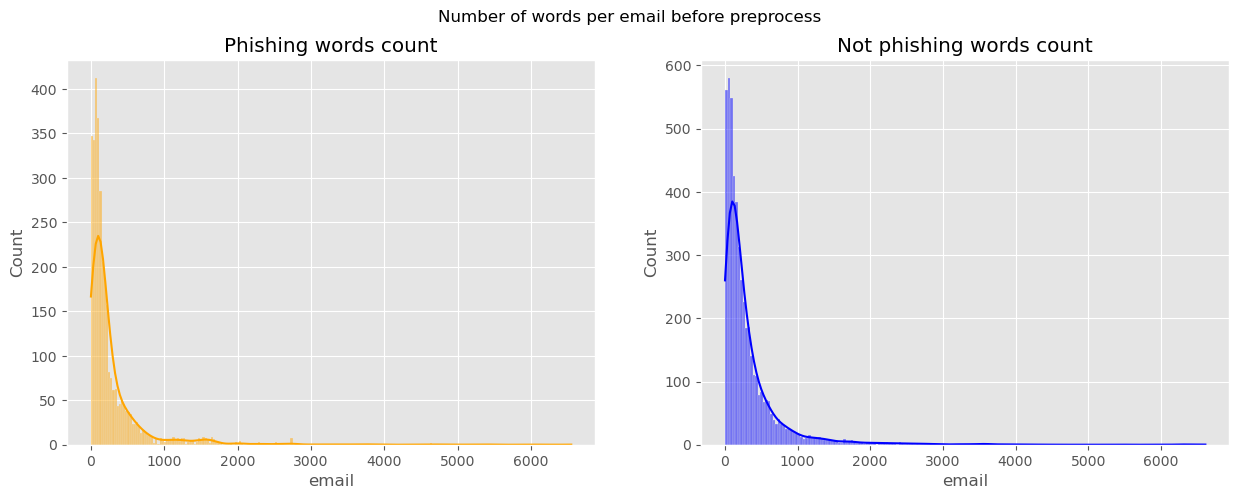

In [36]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
sns.histplot(email_words_1, color='orange', ax=ax1, kde=True)
ax1.set_title('Phishing words count')
sns.histplot(email_words_0, color='blue', ax=ax2, kde=True)
ax2.set_title('Not phishing words count')
fig.suptitle('Number of words per email before preprocess')

In [37]:
#Average word length per tweet
email_words_len_1 = train_df[train_df['label']==1].email.str.split().map(lambda x: [len(word) for word in x])
email_words_len_0 = train_df[train_df['label']==0].email.str.split().map(lambda x: [len(word) for word in x])

In [38]:
email_words_len_1.map(lambda x: np.mean(x))

3       5.500000
4       3.857143
7       4.530347
8       3.323944
10      3.884106
          ...   
8263    3.244444
8265    3.127660
8267    7.302326
8269    2.490909
8278    3.459459
Name: email, Length: 3254, dtype: float64

C:\Users\eremi\anaconda3\envs\keras_envir\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eremi\anaconda3\envs\keras_envir\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0.98, 'Average words lenght per email before preprocess')

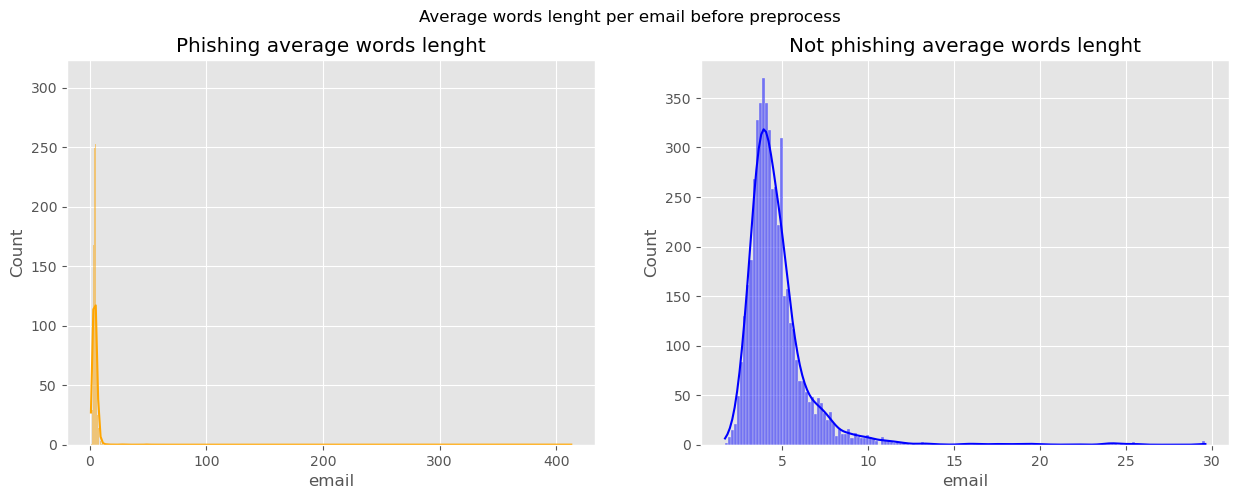

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
sns.histplot(email_words_len_1.map(lambda x: np.mean(x)), color='orange', ax=ax1, kde=True)
ax1.set_title('Phishing average words lenght')
sns.histplot(email_words_len_0.map(lambda x: np.mean(x)), color='blue', ax=ax2, kde=True)
ax2.set_title('Not phishing average words lenght')
fig.suptitle('Average words lenght per email before preprocess')

In [40]:
def words_list(label):
    lst = []
    for x in train_df[train_df['label']==label]['email'].str.split():
        for i in x:
            lst.append(i)
    return lst

In [41]:
def words_list_prep(label):
    lst = []
    for x in train_df[train_df['label']==label]['prep-text'].str.split():
        for i in x:
            lst.append(i)
    return lst

In [42]:
phishing_words = words_list(1)
not_phishing_words = words_list(0)

In [43]:
#Most frequent words before preprocess
words_dic = defaultdict(int)

for word in phishing_words:
   if len(word) > 1:
        words_dic[word]+= 1
        
words_head = sorted(words_dic.items(), key=lambda x:x[1], reverse=True)[:8]

Text(0.5, 1.0, 'Phishing most frequent words before preprocess')

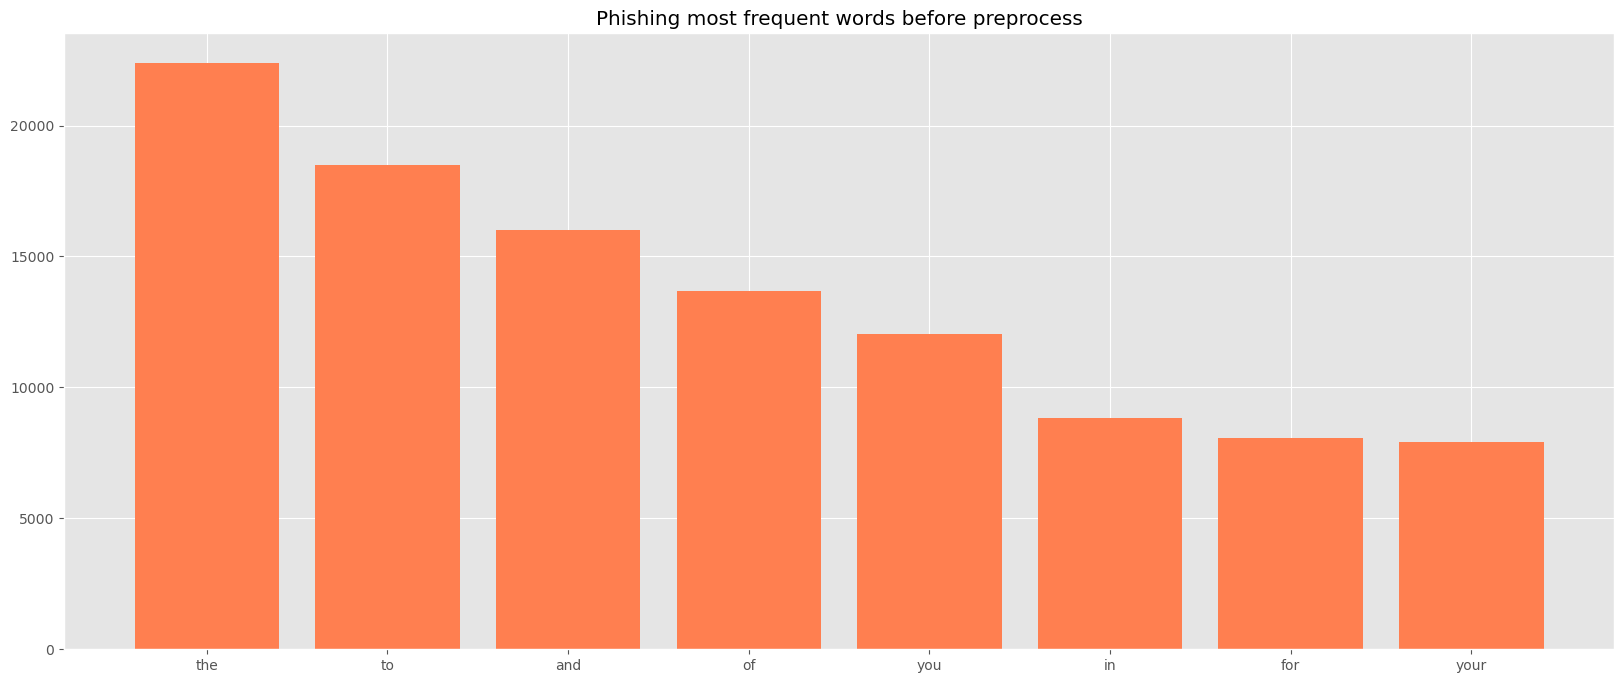

In [44]:
fig, ax= plt.subplots(figsize = (20,8))
x,y = zip(*words_head)
plt.bar(x,y,color='coral')
ax.set_title('Phishing most frequent words before preprocess')
ax.title

In [45]:
words_dic = defaultdict(int)

for word in not_phishing_words:
    if len(word) > 5:
        words_dic[word]+= 1
        
words_head = sorted(words_dic.items(), key=lambda x:x[1], reverse=True)[:10]

Text(0.5, 1.0, 'Not Phishing most frequent words before preprocess')

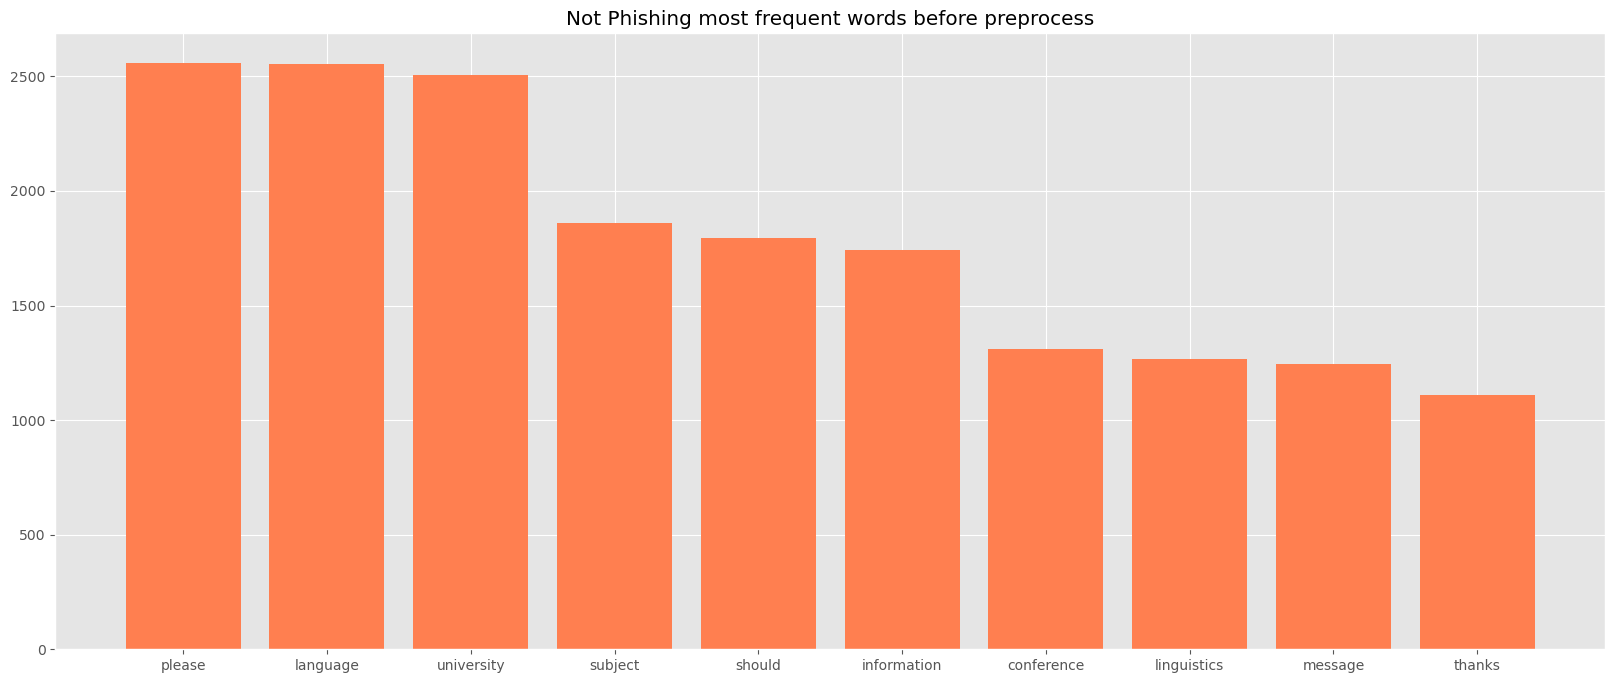

In [46]:
fig, ax= plt.subplots(figsize = (20,8))
x,y = zip(*words_head)
plt.bar(x,y,color='coral')
ax.set_title('Not Phishing most frequent words before preprocess')
ax.title

In [47]:
#Preprocess

In [48]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text,min_len=3, max_len=13):
        if token not in stopwords:
            result.append(token)     
    return result

In [49]:
def get_lemma(word):
    return WordNetLemmatizer().lemmatize(word)

In [50]:
def remove_string(data, regex):
    return data.str.lower().str.replace(regex.lower(), ' ')

def cleanDataset(dataset, columnsToClean, regexList):
    for column in columnsToClean:
        for regex in regexList:
            dataset[column] = remove_string(dataset[column], regex)
    return dataset

def get_regex_list():
    '''
    add here expressions you want to filter out
    '''
    regexList = []
    regexList += ['[^a-zA-z 0-9]+']
    regexList += ['[0-9]']
    regexList += ['https?:[^\]\n\r]+']
    regexList += ['http?:[^\]\n\r]+']
    regexList += ['co?:[^\]\n\r]+']
    regexList += ["  "]
    regexList += ['http']
    return regexList

In [51]:
def prepare_text(tokens):
    tokens = [get_lemma(token) for token in tokens]
    return ' '.join(tokens)

In [52]:
#replace the null values 
train_df['email'].fillna('').astype(str).map(preprocess)
test_df['email'].fillna('').astype(str).map(preprocess)

0       [understand, enough, caffeine, absorbed, yet, ...
1       [hpl, nom, july, see, attached, file, hplo, xl...
2       [legislative, report, independent, energy, pro...
3       [european, pharm, swiss, pharm, ring, bell, mi...
4       [run, higher, trade, volume, way, stock, undis...
                              ...                        
2151    [let, see, professional, seen, thought, might,...
2152    [reply, message, removed, easy, removal, mail,...
2153    [pre, meeting, site, cruise, vince, right, wed...
2154    [impotence, treatment, hello, try, revolutiona...
2155    [metrics, original, message, kitchen, louise, ...
Name: email, Length: 2155, dtype: object

In [53]:
#delete rows with null values 
train_df.dropna(subset=['email'],inplace=True)
test_df.dropna(subset=['email'],inplace=True)

In [54]:
#Train dataframe preprocess
regex_list = get_regex_list()
x = cleanDataset(train_df, ['email'],regex_list)
train_df['prep-text'] = x['email'].apply(lambda y:preprocess(y))
train_df['prep-text'] = train_df['prep-text'].apply(lambda y:prepare_text(y))

In [55]:
#Test dataframe preprocess
x = cleanDataset(test_df, ['email'],regex_list)
test_df['prep-text'] = x['email'].apply(lambda y:preprocess(y))
test_df['prep-text'] = test_df['prep-text'].apply(lambda y:prepare_text(y))

In [56]:
test_df['prep-text']

0       understand enough caffeine absorbed yet mornin...
1          hpl nom july see attached file hplo xl hplo xl
2       legislative report independent energy producer...
3       european pharm swiss pharm ring bell mind curi...
4       run higher trade volume way stock undiscovered...
                              ...                        
2151    let see professional seen thought might good q...
2152    reply message removed easy removal mail list p...
2153    pre meeting site cruise vince right wednesday ...
2154    impotence treatment hello try revolutionary pr...
2155    metric original message kitchen louise sent mo...
Name: prep-text, Length: 2155, dtype: object

In [57]:
train_df['prep-text']

0       disc sex lang dick hudson observation use augh...
1       side galicismos galicismo spanish term name im...
2       equistar deal ticket still available assist ro...
3       hello hot lil horny toy one dream open minded ...
4       software incredibly low price lower drapery se...
                              ...                        
8279    mean could reach take much bandwidth bernie go...
8280    www abc net news justin weekly newsnat jul own...
8281    damn federalist another bumsrush oregon state ...
8282    equistar quote buddy astros game question call...
8283    sep geege schuman wrote watched lathe heaven e...
Name: prep-text, Length: 8284, dtype: object

In [58]:
train_df['prep-text']

0       disc sex lang dick hudson observation use augh...
1       side galicismos galicismo spanish term name im...
2       equistar deal ticket still available assist ro...
3       hello hot lil horny toy one dream open minded ...
4       software incredibly low price lower drapery se...
                              ...                        
8279    mean could reach take much bandwidth bernie go...
8280    www abc net news justin weekly newsnat jul own...
8281    damn federalist another bumsrush oregon state ...
8282    equistar quote buddy astros game question call...
8283    sep geege schuman wrote watched lathe heaven e...
Name: prep-text, Length: 8284, dtype: object

In [59]:
#After Preprocess

In [60]:
phishing_words_aftr = words_list_prep(1)
not_phishing_words_aftr = words_list_prep(0)

In [61]:
words_dic = defaultdict(int)
for word in phishing_words_aftr:
     if len(word) > 3:
        words_dic[word]+= 1
        
words_head = sorted(words_dic.items(), key=lambda x:x[1], reverse=True)[:15]

Text(0.5, 1.0, 'Phishing most freq words after preprocess')

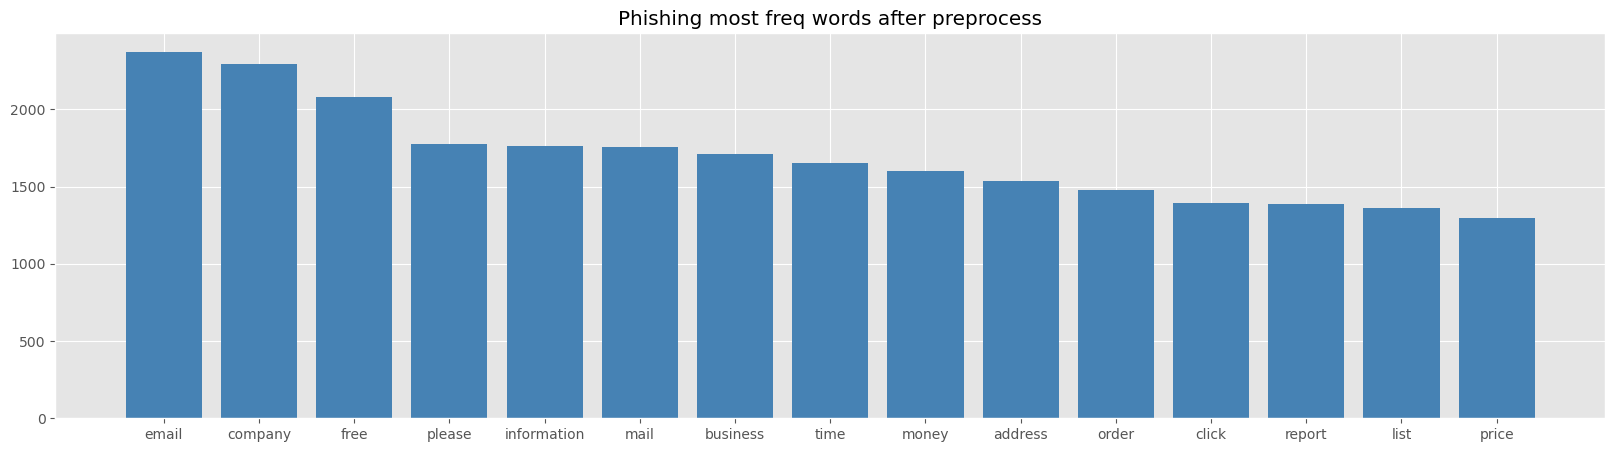

In [62]:
fig, ax= plt.subplots(figsize = (20,5))
x,y = zip(*words_head)
plt.bar(x,y,color='steelblue')
ax.set_title('Phishing most freq words after preprocess')
ax.title

In [63]:
words_dic = defaultdict(int)
for word in not_phishing_words_aftr:
     if len(word) > 3:
        words_dic[word]+= 1
        
words_head = sorted(words_dic.items(), key=lambda x:x[1], reverse=True)[:10]

Text(0.5, 1.0, 'Not Phishing most freq words after preprocess')

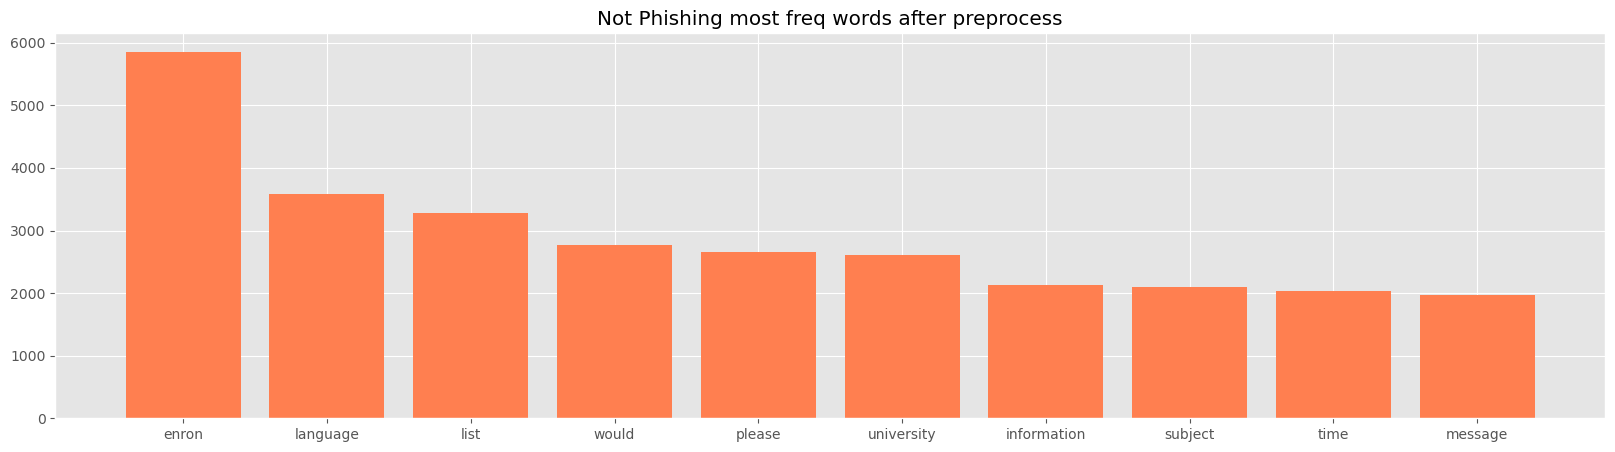

In [64]:
fig, ax= plt.subplots(figsize = (20,5))
x,y = zip(*words_head)
plt.bar(x,y,color='coral')
ax.set_title('Not Phishing most freq words after preprocess')
ax.title

In [65]:
#Text Vectorizer
import time
from sklearn.feature_extraction.text import CountVectorizer


def count_vect_feature(feature, train_df, max_features=5000):
    start_time = time.time()
    cv = CountVectorizer(max_features=max_features,
                             ngram_range=(1, 1),
                             stop_words='english')
    X_feature = cv.fit_transform(train_df[feature])
    print('Count Vectorizer `{}` completed in {} sec.'.format(feature, round(time.time() - start_time,2)))
    return X_feature, cv

In [66]:
train_df = train_df[train_df['email'].isna() == False]

In [67]:
X_email, cv = count_vect_feature('email', train_df)

Count Vectorizer `email` completed in 1.12 sec.


In [68]:
feature = 'label'
X = X_email
y = train_df[feature].values
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.2, random_state = 50) 

In [69]:
#Basiline Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score

In [70]:
model1 = MultinomialNB(fit_prior=True)
model1 = model1.fit(train_X,train_y)

In [71]:
predicted = model1.predict(valid_X)
prediction_acc = np.mean(predicted == valid_y)
print(f" Prediction accuracy: {prediction_acc}")


 Prediction accuracy: 0.9450814725407363


In [72]:
scores = model1.predict(valid_X)
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 0, 0])
y_scores = np.array([1, 0, 0, 0])
try:
    print("Auc: %.2f%%" % (roc_auc_score(scores,valid_y)))
except ValueError:
    pass

Auc: 0.95%


In [73]:
print(classification_report(valid_y, scores.round()))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1031
           1       0.95      0.90      0.93       626

    accuracy                           0.95      1657
   macro avg       0.95      0.94      0.94      1657
weighted avg       0.95      0.95      0.94      1657



In [74]:
score_train = model1.predict(train_X)

In [75]:
print(classification_report(train_y, score_train.round()))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3999
           1       0.98      0.91      0.94      2628

    accuracy                           0.96      6627
   macro avg       0.96      0.95      0.95      6627
weighted avg       0.96      0.96      0.96      6627



In [76]:
#TOKENIZE

In [77]:
X_train, X_valid, y_train, y_valid = train_test_split(train_df['prep-text'], 
                                                      train_df['label'].values, stratify=train_df.label.values, 
                                                      random_state=42, test_size=0.15)

In [78]:
#Padding
token = text.Tokenizer(num_words=None)
max_len = train_df['email'].apply(lambda x: len(str(x).split())).max()

token.fit_on_texts(list(X_train)+list(X_valid))
X_train_seq = token.texts_to_sequences(X_train)
X_valid_seq = token.texts_to_sequences(X_valid)

X_train_pad = pad_sequences(X_train_seq, maxlen = max_len)
X_valid_pad = pad_sequences(X_valid_seq, maxlen = max_len)

word_index = token.word_index

In [79]:
len(word_index)

74651

In [80]:
X_train_pad

array([[    0,     0,     0, ...,     1, 21052, 38426],
       [    0,     0,     0, ...,  1942,   282,   647],
       [    0,     0,     0, ...,   125,    69,   266],
       ...,
       [    0,     0,     0, ...,   113,   273,     3],
       [    0,     0,     0, ...,     6,    23,   360],
       [    0,     0,     0, ...,  3834,  3784,    22]])

In [81]:
#GloVe

In [82]:
from tqdm import tqdm

In [83]:
embeddings_dict = {}
glove_list = open(r'C:\Users\eremi\Desktop\Proiect dm\glove.840B.300d.txt', 'r', encoding='utf-8')
for line in tqdm(glove_list):
    values = line.split(" ")
    word = values[0]
    scores = np.asarray([float(value) for value in values[1:]])
    embeddings_dict[word] = scores
glove_list.close()

print(f'There are {len(embeddings_dict)} word vectors')

2196018it [02:18, 15868.18it/s]

There are 2196017 word vectors


In [84]:
len(embeddings_dict)

2196017

In [85]:
len(embeddings_dict['a'])

300

In [86]:
embedding_matrix = np.zeros((len(word_index)+1, 300))

for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|██████████| 74651/74651 [00:00<00:00, 442534.98it/s]


In [87]:
embedding_matrix.shape

(74652, 300)

In [88]:
#LSTM

In [89]:
model_lstm = Sequential()
model_lstm.add(Embedding(len(word_index)+1, 
                    300,
                    weights=[embedding_matrix],
                    input_length=max_len,
                   trainable=False))

model_lstm.add(LSTM(80, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [90]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 6613, 300)         22395600  
                                                                 
 lstm (LSTM)                 (None, 80)                121920    
                                                                 
 dense (Dense)               (None, 1)                 81        
                                                                 
Total params: 22,517,601
Trainable params: 122,001
Non-trainable params: 22,395,600
_________________________________________________________________


In [91]:
def roc_auc(predictions,target):
    '''
    This methods returns the AUC Score when given the Predictions
    and Labels
    '''
    
    fpr, tpr, thresholds = metrics.roc_curve(target, predictions)
    roc_auc = metrics.auc(fpr, tpr)
    return roc_auc

In [92]:
scores = model_lstm.predict(X_valid_pad)
print("Auc: %.2f%%" % (roc_auc(scores,y_valid)))

39/39 [==============================] - 136s 3s/step
Auc: 0.55%


In [93]:
print(classification_report(y_valid, scores.round()))

              precision    recall  f1-score   support

           0       0.64      0.45      0.53       755
           1       0.41      0.60      0.49       488

    accuracy                           0.51      1243
   macro avg       0.53      0.53      0.51      1243
weighted avg       0.55      0.51      0.51      1243



In [94]:
score_train = model_lstm.predict(X_train_pad)

221/221 [==============================] - 865s 4s/step


In [95]:
print(classification_report(y_train, score_train.round()))

              precision    recall  f1-score   support

           0       0.61      0.43      0.50      4275
           1       0.39      0.57      0.47      2766

    accuracy                           0.48      7041
   macro avg       0.50      0.50      0.48      7041
weighted avg       0.52      0.48      0.49      7041

